# This Assignment is done by N M Emran Hussain (GWID: 24414095)

Testing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
print("All packages imported successfully!")


All packages imported successfully!


In [2]:
print(f"Pandas version: {pd.__version__}")

Pandas version: 2.3.0


In [3]:
# Test loading the data file
df = pd.read_csv('UNRATE.csv')
print(f"Data loaded successfully! Shape: {df.shape}")

Data loaded successfully! Shape: (928, 2)


## Data Loading 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the provided unemployment data
df = pd.read_csv('UNRATE.csv')
df.head()

,observation_date,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


Basic Exploration

In [6]:
print("Data types:")
print(df.dtypes)
print("\nBasic statistics:")
df['UNRATE'].describe()

Data types:
observation_date     object
UNRATE              float64
dtype: object

Basic statistics:


count    928.000000
mean       5.676724
std        1.708352
min        2.500000
25%        4.300000
50%        5.500000
75%        6.700000
max       14.800000
Name: UNRATE, dtype: float64

## Statistical Analysis:

1. Calculate overall average unemployment rate

In [8]:
average_unrate = df['UNRATE'].mean()
print(f"Average Unemployment Rate: {average_unrate:.2f}%")

Average Unemployment Rate: 5.68%


2. Find minimum and maximum unemployment rates with their dates

In [10]:
# Format the results using f-strings
min_rate = min_row['UNRATE']
min_date = min_row['observation_date'].strftime('%B %Y')

max_rate = max_row['UNRATE']
max_date = max_row['observation_date'].strftime('%B %Y')

min_output = f"Minimum Unemployment Rate: {min_rate:.1f}% in {min_date}"
max_output = f"Maximum Unemployment Rate: {max_rate:.1f}% in {max_date}"

min_output, max_output


('Minimum Unemployment Rate: 2.5% in May 1953',
 'Maximum Unemployment Rate: 14.8% in April 2020')

3. Calculate unemployment statistics by decades

In [12]:
# Extract the decade from the date
df['Decade'] = (df['observation_date'].dt.year // 10) * 10

# Group by decade and calculate statistics
decade_stats = df.groupby('Decade')['UNRATE'].agg(['mean', 'min', 'max', 'std']).reset_index()

# Round the values for better readability
decade_stats = decade_stats.round(2)

# Display the decade statistics using print
print("Unemployment Statistics by Decade:\n")
for _, row in decade_stats.iterrows():
    print(f"{int(row['Decade'])}s → Mean: {row['mean']}%, Min: {row['min']}%, Max: {row['max']}%, Std Dev: {row['std']}%")


Unemployment Statistics by Decade:

1940s → Mean: 4.9%, Min: 3.4%, Max: 7.9%, Std Dev: 1.38%
1950s → Mean: 4.51%, Min: 2.5%, Max: 7.5%, Std Dev: 1.29%
1960s → Mean: 4.78%, Min: 3.4%, Max: 7.1%, Std Dev: 1.07%
1970s → Mean: 6.22%, Min: 3.9%, Max: 9.0%, Std Dev: 1.16%
1980s → Mean: 7.27%, Min: 5.0%, Max: 10.8%, Std Dev: 1.48%
1990s → Mean: 5.76%, Min: 4.0%, Max: 7.8%, Std Dev: 1.05%
2000s → Mean: 5.54%, Min: 3.8%, Max: 10.0%, Std Dev: 1.45%
2010s → Mean: 6.22%, Min: 3.5%, Max: 9.9%, Std Dev: 2.06%
2020s → Mean: 4.9%, Min: 3.4%, Max: 14.8%, Std Dev: 2.28%


4. Identify the year with the highest average unemployment rate

In [13]:
# Extract the year from the observation_date
df['Year'] = df['observation_date'].dt.year

# Group by year and calculate the average unemployment rate
yearly_avg = df.groupby('Year')['UNRATE'].mean().reset_index()

# Find the year with the highest average unemployment rate
max_avg_row = yearly_avg.loc[yearly_avg['UNRATE'].idxmax()]
max_year = int(max_avg_row['Year'])
max_avg_rate = max_avg_row['UNRATE']

# Print the result in formatted style
print(f"Year with Highest Average Unemployment Rate: {max_year}")
print(f"Average Unemployment Rate: {max_avg_rate:.2f}%")


Year with Highest Average Unemployment Rate: 1982
Average Unemployment Rate: 9.71%


## Business Questions to Answer:

1. What was the unemployment rate during major economic events (2008 financial crisis,
COVID-19 pandemic)

In [15]:
# Filter data for 2008 financial crisis and COVID-19 pandemic periods
crisis_2008 = df[(df['observation_date'].dt.year == 2008) | (df['observation_date'].dt.year == 2009)]
covid_2020 = df[(df['observation_date'].dt.year == 2020) | (df['observation_date'].dt.year == 2021)]

# Get the peak unemployment during each event
peak_2008 = crisis_2008.loc[crisis_2008['UNRATE'].idxmax()]
peak_2020 = covid_2020.loc[covid_2020['UNRATE'].idxmax()]

# Format and display results
result_2008 = f"2008 Financial Crisis Peak: {peak_2008['UNRATE']:.1f}% in {peak_2008['observation_date'].strftime('%B %Y')}"
result_2020 = f"COVID-19 Pandemic Peak: {peak_2020['UNRATE']:.1f}% in {peak_2020['observation_date'].strftime('%B %Y')}"

result_2008, result_2020



('2008 Financial Crisis Peak: 10.0% in October 2009',
 'COVID-19 Pandemic Peak: 14.8% in April 2020')

2. Which decade had the most stable unemployment rates (lowest standard deviation)

In [16]:
# Find the decade with the lowest standard deviation of unemployment rates
most_stable_decade = decade_stats.loc[decade_stats['std'].idxmin()]
stable_decade = int(most_stable_decade['Decade'])
lowest_std = most_stable_decade['std']

# Print the result in formatted style
print(f"Most Stable Decade: {stable_decade}s")
print(f"Standard Deviation of Unemployment Rate: {lowest_std:.2f}%")


Most Stable Decade: 1990s
Standard Deviation of Unemployment Rate: 1.05%


3. What’s the trend in unemployment over the last 10 years?

In [18]:
# Filter the last 10 years of data
latest_year = df['observation_date'].dt.year.max()
last_10_years_df = df[df['observation_date'].dt.year >= latest_year - 9]

# Group by year and calculate average unemployment rate
last_10_years_trend = last_10_years_df.groupby('Year')['UNRATE'].mean().reset_index()

# Print the year-wise trend
for _, row in last_10_years_trend.iterrows():
    print(f"{int(row['Year'])}: {row['UNRATE']:.2f}%")

# At 2020, when Covid-19 spikes


2016: 4.88%
2017: 4.36%
2018: 3.89%
2019: 3.68%
2020: 8.10%
2021: 5.36%
2022: 3.64%
2023: 3.63%
2024: 4.03%
2025: 4.12%


## Data Visualization: 

1. Create a line chart showing unemployment rate over time

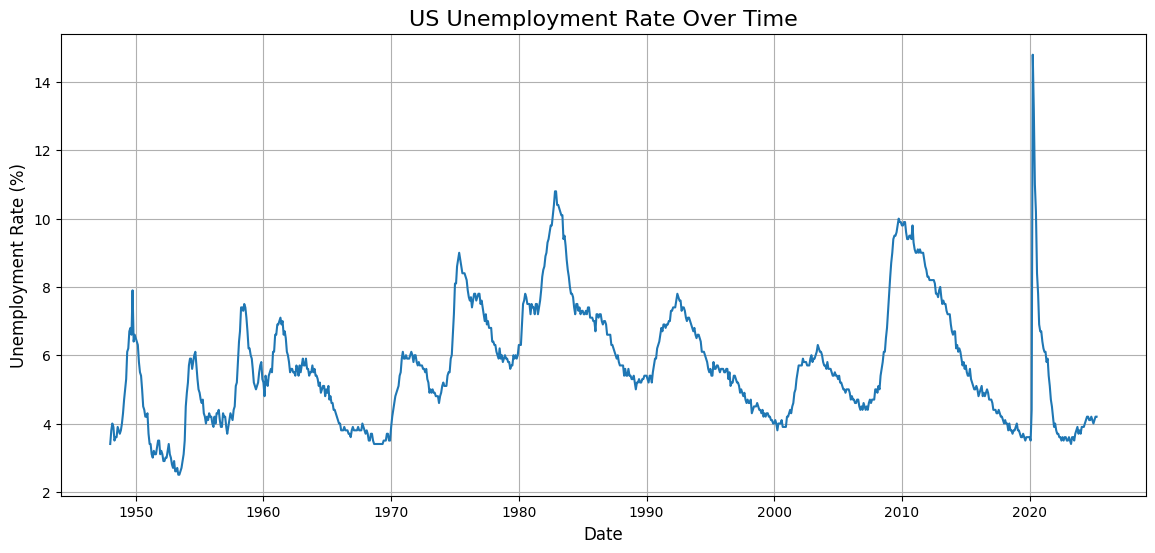

'unemployment_rate_trend.png'

In [22]:
import matplotlib.pyplot as plt

# Set plot size
plt.figure(figsize=(14, 6))

# Plot the unemployment rate over time
plt.plot(df['observation_date'], df['UNRATE'], linewidth=1.5)

# Add title and labels
plt.title('US Unemployment Rate Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.grid(True)

# Save the figure as a PNG file
plot_path = 'unemployment_rate_trend.png'
plt.savefig(plot_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

plot_path


2. Create a bar chart showing average unemployment by decade

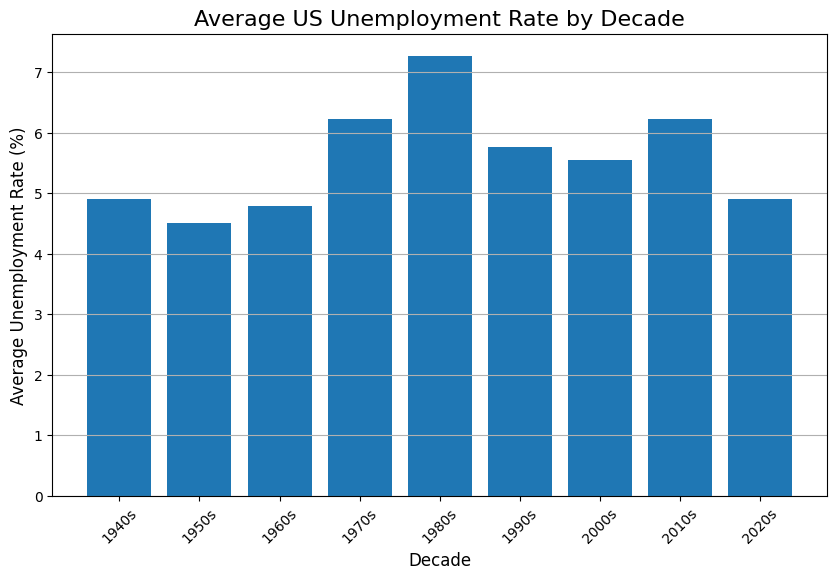

'average_unemployment_by_decade.png'

In [24]:
# Set plot size
plt.figure(figsize=(10, 6))

# Plot bar chart for average unemployment by decade
plt.bar(decade_stats['Decade'].astype(str) + 's', decade_stats['mean'])

# Add title and labels
plt.title('Average US Unemployment Rate by Decade', fontsize=16)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Average Unemployment Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Save the figure as a PNG file
bar_chart_path = 'average_unemployment_by_decade.png'
plt.savefig(bar_chart_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

bar_chart_path
